# Decision Trees + Random Forest 

In [118]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

## Data 

In [79]:
df = datasets.load_iris()

In [3]:
#df

In [81]:
data = df['data']
X = pd.DataFrame(data, columns = df['feature_names'])
y = pd.DataFrame(df['target'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    test_size=0.33, random_state=42, stratify=y)

In [84]:
# X_train
# X_test
# y_train
# y_test 

In [85]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


In [86]:
X_train
#X_test
#y_train
#y_test 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
136,6.3,3.4,5.6,2.4
17,5.1,3.5,1.4,0.3
142,5.8,2.7,5.1,1.9
59,5.2,2.7,3.9,1.4
6,4.6,3.4,1.4,0.3
...,...,...,...,...
49,5.0,3.3,1.4,0.2
86,6.7,3.1,4.7,1.5
45,4.8,3.0,1.4,0.3
60,5.0,2.0,3.5,1.0


## Zero-Mean and Unit Variance

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [88]:
scaler.mean_

array([5.883, 3.074, 3.764, 1.199])

In [89]:
X_train_standardized = scaler.transform(X_train)
X_train_standardized = pd.DataFrame(X_train_standardized)
X_train_standardized.columns = X_train.columns

X_test_standardized = scaler.transform(X_test)
X_test_standardized = pd.DataFrame(X_test_standardized)
X_test_standardized.columns = X_test.columns

In [90]:
X_train_standardized

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.489131,0.714933,1.034255,1.555028
1,-0.918440,0.934237,-1.331687,-1.164005
2,-0.097357,-0.820199,0.752595,0.907639
3,-0.801143,-0.820199,0.076611,0.260250
4,-1.504929,0.714933,-1.331687,-1.164005
...,...,...,...,...
95,-1.035738,0.495628,-1.331687,-1.293483
96,0.958322,0.057019,0.527267,0.389728
97,-1.270333,-0.162285,-1.331687,-1.164005
98,-1.035738,-2.355331,-0.148716,-0.257661


## Principal Component Analysis

In [91]:
pca = PCA()
pca.fit(X_train_standardized)
print(pca.explained_variance_ratio_)

[0.73282843 0.2267426  0.03629189 0.00413708]


Text(0, 0.5, 'Explained Variance Ratio')

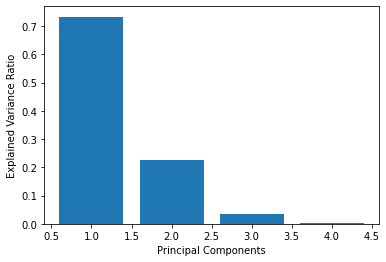

In [92]:
pc_name = [i+1 for i in range(len(pca.explained_variance_ratio_))]
plt.bar(pc_name, pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")

In [93]:
np.sum(pca.explained_variance_ratio_[0:2])

0.9595710286013285

In [94]:
X_train_pca = pca.transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

## Visualization of the First 2 PC's

Text(0, 0.5, 'Pricipal Component 2')

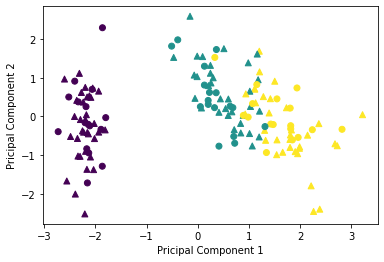

In [95]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, marker = '^')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test)

plt.xlabel('Pricipal Component 1')
plt.ylabel('Pricipal Component 2')

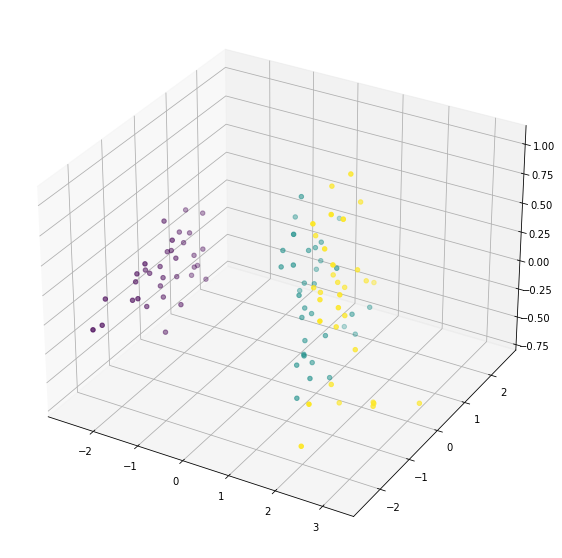

In [96]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c = y_train)

In [97]:
X_train_pcs_df = pd.DataFrame(X_train_pca)
y_train['y'] = y_train[0]
y_train.drop(0, axis=1, inplace = True)
y_train.reset_index(inplace = True)
df = pd.concat([X_train_pcs_df, y_train], axis = 1)
fig = px.scatter_3d(df, x=0, y=1, z=2,
              color='y')
fig.show()

## Decision Tree Classifier

In [117]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_pca, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[0] <= -1.14\ngini = 0.667\nsamples = 100\nvalue = [34, 33, 33]'),
 Text(0.375, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.625, 0.75, 'X[0] <= 1.209\ngini = 0.5\nsamples = 66\nvalue = [0, 33, 33]'),
 Text(0.5, 0.5833333333333334, 'X[2] <= 0.396\ngini = 0.26\nsamples = 39\nvalue = [0, 33, 6]'),
 Text(0.25, 0.4166666666666667, 'X[0] <= 1.099\ngini = 0.114\nsamples = 33\nvalue = [0, 31, 2]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.375, 0.25, 'X[2] <= -0.242\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.4166666666666667, 'X[0] <= 0.821\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.625, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.875, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.75, 0.5

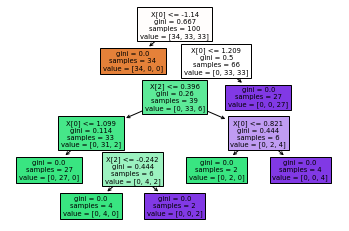

In [112]:
tree.plot_tree(clf, filled = 'True')

In [113]:
# make prediction
yhat_train = clf.predict(X_train_pca)
yhat_test = clf.predict(X_test_pca)

# accuracy by using the score function
print('training accuracy by the score function = {}'.format(clf.score(X_train_pca, y_train)))
print('testing accuracy by the score function = {}'.format(clf.score(X_test_pca, y_test)))

training accuracy by the score function = 1.0
testing accuracy by the score function = 0.92


In [114]:
print('Training Report')
print(classification_report(y_train, yhat_train))
print('\n')
print('Testing Report')
print(classification_report(y_test, yhat_test))

Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Testing Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.84      0.94      0.89        17
           2       0.93      0.82      0.87        17

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



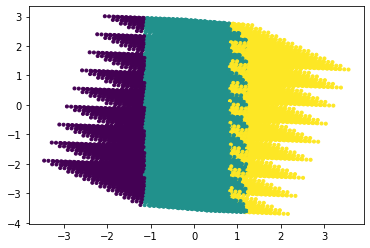

In [120]:
#### create the grid #####

# define the x and y scale
x1grid = np.arange(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 0.3)
x2grid = np.arange(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 0.3)
x3grid = np.arange(X.iloc[:, 2].min(), X.iloc[:, 2].max(), 0.3)
x4grid = np.arange(X.iloc[:, 3].min(), X.iloc[:, 3].max(), 0.3)

# create all of the lines and rows of the grid
xx, yy, zz, ll = np.meshgrid(x1grid, x2grid, x3grid, x4grid)

# flatten each grid to a vector
r1, r2, r3, r4 = xx.flatten(), yy.flatten(), zz.flatten(), ll.flatten()
r1, r2, r3, r4 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1)), r3.reshape((len(r3), 1)), r4.reshape((len(r4), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1, r2, r3, r4))
grid_standardized = scaler.transform(grid)
grid_pca = pca.transform(grid_standardized)

# make predictions for the grid
yhat = clf.predict(grid_pca)

# reshape predictions
zz = yhat.reshape(xx.shape)

# get the pca transformation of grid

grid_pca_2 = grid_pca[:, 0:2]

#
plt.scatter(grid_pca[:, 0], grid_pca[:, 1], c = yhat, marker = '.')


# # plot the grid of x, y and z values as a surface
# plt.contourf(xx, yy, zz, cmap='Paired')
# plt.scatter(df['x1'], df['x2'], c=df['y'], alpha=0.5)
# plt.ylim([x2min, x2max])
# plt.xlim([x1min, x1max])

## Random Forest

In [119]:
clf_rf = RandomForestClassifier(random_state=0, max_depth=3, n_estimators = 3000, max_samples = 0.8, 
                                max_leaf_nodes = 20, min_samples_leaf = 2)
clf_rf.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=20, max_samples=0.8,
                       min_samples_leaf=2, n_estimators=3000, random_state=0)

In [66]:
# make prediction
yhat_train = clf_rf.predict(X_train_pca)
yhat_test = clf_rf.predict(X_test_pca)

# accuracy by using the score function
print('training accuracy by the score function = {}'.format(clf_rf.score(X_train_pca, y_train)))
print('testing accuracy by the score function = {}'.format(clf_rf.score(X_test_pca, y_test)))

training accuracy by the score function = 0.98
testing accuracy by the score function = 0.9


In [67]:
print('Training Report')
print(classification_report(y_train, yhat_train))
print('\n')
print('Testing Report')
print(classification_report(y_test, yhat_test))

Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      1.00      0.97        33
           2       1.00      0.94      0.97        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



Testing Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.83      0.88      0.86        17
           2       0.88      0.82      0.85        17

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



([<matplotlib.axis.XTick at 0x2606ba090d0>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)')])

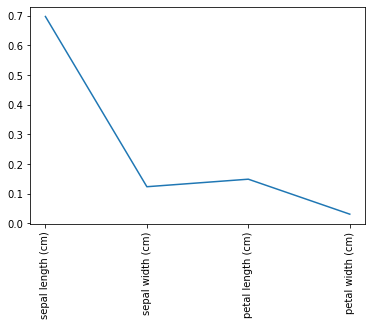

In [116]:
# feature importance
plt.plot(clf_rf.feature_importances_)
plt.xticks(np.arange(len(clf_rf.feature_importances_)), X.columns, rotation='vertical')